# Title: AIDI 1002 Final Term Project Report

#### Semal Parimalbhai Shastri, 200543129, semalparimalbhai.shastri@mygeorgian.ca
#### Brian Ritchie, 200588851, Brian.Ritchie@MyGeorgian.ca

# Introduction:

#### Problem Description:

Hate speech is an ongoing problem on social media.  The platform providers are obligated to be gatekeepers of this content which requires them to have automated hate speech detection algorithms.  This paper focused on the creation and utilisation of a new data set which divided the suspicious texts into three categories:  hate speech, offensive and neither.  The authors created a multi-class classifier to predict the category of the text.  The learnings from where the classifier succeeded and failed will further work in hate speech detection.

#### Context of the Problem:

There are both moral and legal implications of hate speech, with those found guilty of hate speech subject to fines and possible imprisonment.  These obligations extend to social media platforms, who have created policies to prohibit users from using hate speech.  Automated hate speech detection is a key tool in stemming the flow of hate speech online.

Identification of the words used in hate speech is almost a trivial task today.  However, distinguising between offensive language and hate speech is not so clear.  Offensive text can be the common language of many groups in society and must be allowed, while not giving room for the more nefarious and illegal use of some of the same words in hate speech.

#### Limitation About other Approaches:

Prior approaches on the data sets, including the ongoing work of Hatebase.org, have too broad a definition of hate speech and define it primarily in the words that are used instead of how they are used.  Other supervised approaches have equated hate speech with offensive language, leading to high rates of false positive.  

From review of a number of other papers, it appears there is no consistency in the data sets.  Some use toxicity as a measure, others use key words.  Some have binary labels, some multiclass.  Some are labeled using crowdsourced methods, many are labeled by the authors.  The labeling process for these data sets leads to bias and inconsistencies.  

#### Solution:

Our intent in this project is to run three models on the labeled training data with a 20% holdback for test.  We will try to use the cross validation where possible and will try to optimize hyperparameters with gridsearch.  Then, we will run the same models on an alternate labeled hate speech data set that is only labled with binary labels.

# Background

Related work:

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Kwok and Wang [1] | Used a Naive Bayes classifier on unigrams from Tweets. Focused on black hate speech.  | 25k Twitters gathered | 76% accuracy.  Unigrams only. Poor label consistency.
| Burnap and Williams [2] | Supervised unigram and bigram.  Used Baysien Logistic Regression, RF and SVM.  | 450k Twitter post murder event; 2k labeled | High false negatives.
| Wang et al. [3] | Study of cursing distribution on Twitter| 51M Tweets collected | No hate speech classification done.
| Gitari et al. [4] | Rule based approach to develop lexicon. Drew on semantic analysis. | 100 blog posts from 10 sites.  Small dataset.  | No real classification model built
|Silva et al. [5] | Syntactic structure used: I < intensity >< userintent >< hatetarget > | 27M Whispers + 512M Tweets | No Classifier used.  No method descibed.
| Waseem and Hovy [6] | Used character bi to fourgrams and logistic regression classification   | 17K annotated tweets |  Cite a F1 score of 74%. Similar precision & recall.
| Djuric et al. [7] | Paragraph2vec continuous bag-of-words neural network to vectorize and logistic regr classifier | 55k hate + 895k other Yahoo Finance posts | Only report AUC of 0.8
| Mollas et al. [8] | Alternate Ethos data set.  Used variety of models.  Achieved 80% accuracy | 950 labeled | Small data set, but well curated.
| **Davidson et al.** [9] | Used logistic regression with L2 regularization.  Separate classifier for each class. | 25k labeled & 85M unlabeled Tweets. | No comparable datasets with similar label strategy.


# Methodology

The paper used a multiclass label system on a dataset that had hate words in the tweets.  Thise were classified as hate, offensive or neither.  With the data set, they performed a set of cleaning steps to bring the tweets to a vectorized form.  They used a multiclass classifier to train on 90% of the data, then measured performance metrics with the 10% hold back test set.  The classifier they settled on was a Logistic Regression classifier with 5 fold stratified cross validation and with L2 normalization, the lgfbs solver and a balanced class weight.  

Their best model achieved overall scores of precision, recall and f1 of 0.90, 0.90 and 0.91, respectively.  However, when the confusion matrix is reviewed (see Figure 1), it shows that almost 40% of hate speech was misclassified.  We will compare the confusion matrix shown in the paper to our results.  

Their code provided on Github in their notebook was written in Python 2.x.  We attempted to update and duplicate the code, but were running into convergence issues.  When we ran a non-cross validated logistic regression model, we were able to execute.  However, the metrics were somewhat less than those cited in the paper.  The confusion matrix shown in Figure 2, shows that our logistic regresion model had poorer performance in all categories.

![Figure 1](figures/Research_Paper_Confusion_Matrix.png "Figure 1: Davidson et al.  Confusion Matrix from best model")

Two other classification models were constructed to assess their ability in classifying the labeled data from the paper.  A naive Bayes (NB) model was built using the following hyperparameters:  
 - learning rate
 - threshold
 
We were able to achieve convergence with the NB model and used the 5 fold stratified cross validation for the training.  The 20% holdback test data was predicted using the model and the confusion matrix is shown in Figure 3.  The results were not as good as the logistic regression model.


The third model used was a linear SVM model.  Again we used the 5 fold stratified cross validation for the training and used the model to make predictions on the test data set.  The model employed a balanced class weight, a C of 0.001 and 0.1 and a squared hinge loss.  The confusion matrix is shown in Figure 4. Again, the results were not as good as the logistical regression model though  it did predict 80% of the offensive texts correctly and 50%  hate tweets.  The hate speech Random Forest prediction was poor at 27%.

We then brought in a second data set to test the model.  We chose a more recent data set from Mollas et al [8] called the Ethos dataset.  This data set was labeled with a hate speech indicator that was valued from 0 to 1.  In their paper, the authors converted this to a binary label using anything valued higher than 0.5 as hate and less than 0.5 as not hate.  We employed the same technique.  This was a smaller data set, but had been rigorously labeled.

We used our models, which were built for the Davidson et al [9] multiclass data set, on this binary Ethos data set.  There were two small changes to to code required to make this switch.  First, the imported data was divided into Hate and NotHate using the 0.5 cutoff.  Secondly, the confusion matrix code need to be modified from multiclass to binary.

The models with their existing hyperparameters were used on the Ethos data generating confusion matrices shown in Figures 5, 6 and 7.  For comparison, this same binary Ethos data set is cited on PapersWithCode (https://paperswithcode.com/sota/hate-speech-detection-on-ethos-binary?metric=Classification%20Accuracy) as having benchmarking accuracy of close to 0.8 overall and F1 scores of 0.8 as well.  

Our best model was the logisic legression model which had an overall accuracy of 0.80.  The models which beat ours were primarily using BERT LLM embeddings.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import os
import pickle
import re
import nltk
from nltk.stem.porter import *
from sklearn.exceptions import ConvergenceWarning

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

import sys
sys.path.append('utils')
from utils.text_processing import *
from utils.sentence_cleaner import *
from utils.pos_processing import get_pos_tags, get_pos_vectorizer
from utils.feature_extraction import count_twitter_objs, other_features, get_feature_array
from utils.models import linear_svc , random_forest , multinomial_nb , logistic_regression 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", category=UserWarning)

In [2]:
df = pd.read_csv('data/train/labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


### Columns key:
count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).


hate_speech = number of CF users who judged the tweet to be hate speech.


offensive_language = number of CF users who judged the tweet to be offensive.


neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.


class = class label for majority of CF users.

    0 - hate speech
    1 - offensive  language
    2 - neither

tweet = raw tweet text


In [4]:
tweets = df.tweet

#Construct tfidf matrix and get relevant scores
tfidf = vectorizer_tfidf.fit_transform(tweets).toarray()
vocab = {v:i for i, v in enumerate(vectorizer_tfidf.get_feature_names_out())}
idf_vals = vectorizer_tfidf.idf_
idf_dict = {i:idf_vals[i] for i in vocab.values()} #keys are indices; values are IDF scores

In [5]:
vectorizer = get_pos_vectorizer()

In [6]:
#Construct POS TF matrix and get vocab dict
pos = vectorizer.fit_transform(pd.Series(get_pos_tags(tweets))).toarray()
pos_vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names_out())}

In [7]:
other_features_names = ["FKRA", "FRE","num_syllables", "avg_syl_per_word", "num_chars", "num_chars_total", \
                        "num_terms", "num_words", "num_unique_words", "vader neg","vader pos","vader neu", \
                        "vader compound", "num_hashtags", "num_mentions", "num_urls", "is_retweet"]

feats = get_feature_array(tweets)

#Now join them all up
M = np.concatenate([tfidf,pos,feats],axis=1)

M.shape

(24783, 4023)

In [8]:
#Finally get a list of variable names
variables = ['']*len(vocab)
for k,v in vocab.items():
    variables[v] = k

pos_variables = ['']*len(pos_vocab)
for k,v in pos_vocab.items():
    pos_variables[v] = k

feature_names = variables+pos_variables+other_features_names

In [9]:
X = pd.DataFrame(M)
# y = df['class'].astype(int)

y = df['class']= df['class'].astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2 , stratify= y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=  39.5s
[CV] END .................................................... total time=  37.4s
[CV] END .................................................... total time=  38.9s
[CV] END .................................................... total time=  37.0s
[CV] END .................................................... total time=  39.8s
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.06      0.10       286
           1       0.84      0.97      0.90      3838
           2       0.78      0.47      0.59       833

    accuracy                           0.83      4957
   macro avg       0.68      0.50      0.53      4957
weighted avg       0.81      0.83      0.80      4957


RandomForest Confusion Matrix (Counts):


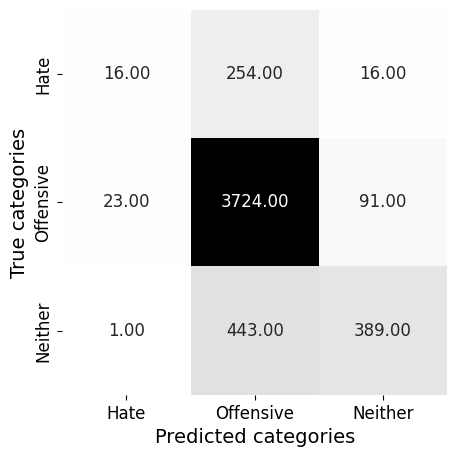


RandomForest Normalized Confusion Matrix:


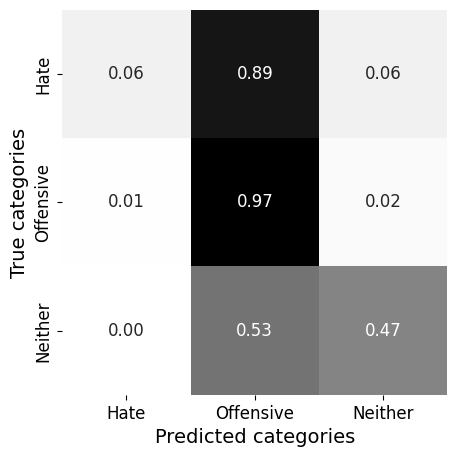

In [11]:
random_forest(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............model__C=0.001, select__threshold=mean; total time= 2.4min
[CV] END .............model__C=0.001, select__threshold=mean; total time= 2.4min
[CV] END .............model__C=0.001, select__threshold=mean; total time= 2.5min
[CV] END .............model__C=0.001, select__threshold=mean; total time= 2.4min
[CV] END .............model__C=0.001, select__threshold=mean; total time= 2.5min
[CV] END ...........model__C=0.001, select__threshold=median; total time= 2.5min
[CV] END ...........model__C=0.001, select__threshold=median; total time= 2.5min
[CV] END ...........model__C=0.001, select__threshold=median; total time= 2.6min
[CV] END ...........model__C=0.001, select__threshold=median; total time= 2.6min
[CV] END ...........model__C=0.001, select__threshold=median; total time= 2.6min
[CV] END ..............model__C=0.01, select__threshold=mean; total time= 2.7min
[CV] END ..............model__C=0.01, select__thr

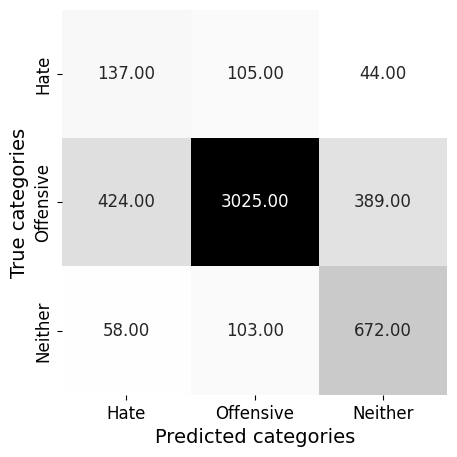


Logistic Regression with Feature Selection Normalized Confusion Matrix:


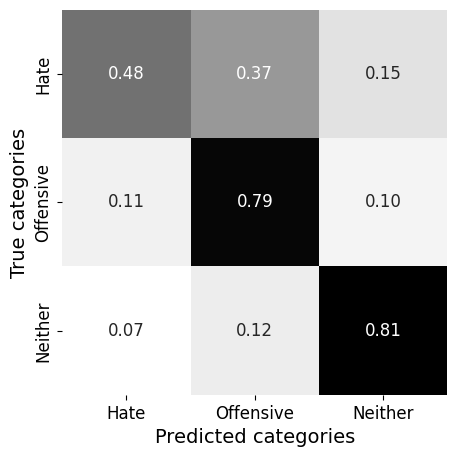

In [12]:
logistic_regression(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=  10.2s
[CV] END .................................................... total time=  10.2s
[CV] END .................................................... total time=  10.1s
[CV] END .................................................... total time=  10.1s
[CV] END .................................................... total time=  10.3s
LinearSVC Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.22      0.26       286
           1       0.90      0.88      0.89      3838
           2       0.61      0.72      0.66       833

    accuracy                           0.81      4957
   macro avg       0.60      0.61      0.60      4957
weighted avg       0.81      0.81      0.81      4957


LinearSVC Confusion Matrix (Counts):


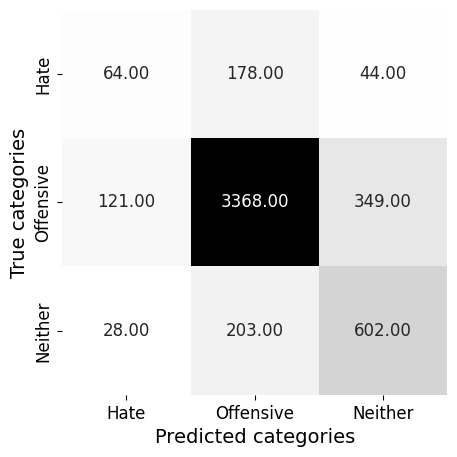


LinearSVC Normalized Confusion Matrix:


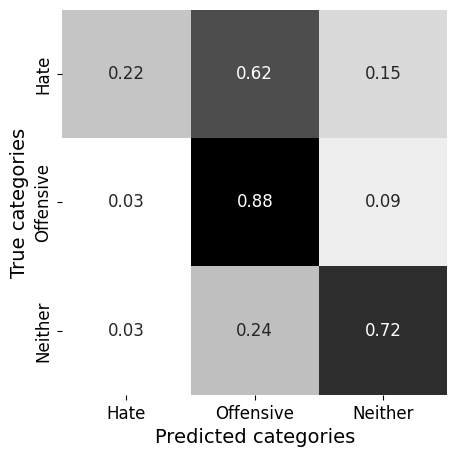

In [13]:
linear_svc(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
MultinomialNB with Feature Selection and Min-Max Scaling Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.12      0.16       286
           1       0.86      0.92      0.89      3838
           2       0.63      0.52      0.57       833

    accuracy                           0.81      4957
   macro avg       0.57      0.52      0.54      4957
weighted avg       0.78      0.81      0.79      4957


MultinomialNB with Feature Selection and Min-Max Scaling Confusion Matrix 

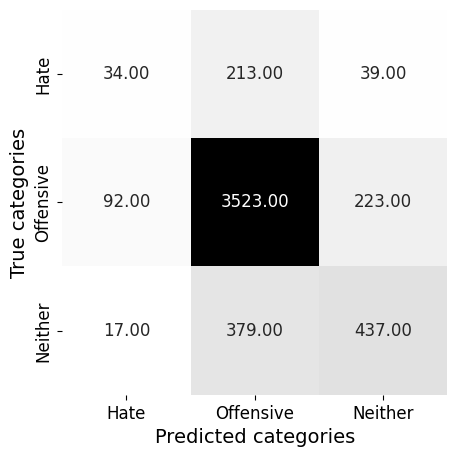


MultinomialNB with Feature Selection and Min-Max Scaling Normalized Confusion Matrix:


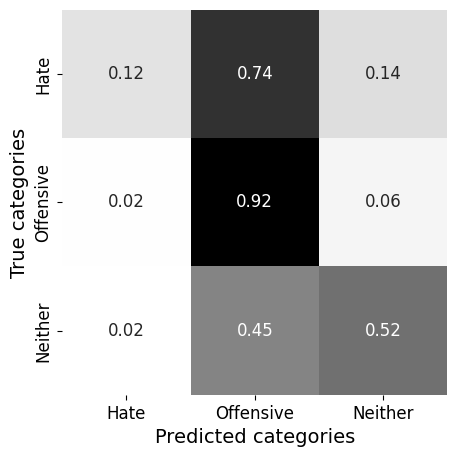

In [14]:
multinomial_nb(X_train, y_train, X_test, y_test)

## Testing on Ethos Dataset

In [15]:
df_test = pd.read_csv("data/test/Ethos_Dataset_Binary.csv", sep=";")

df_test["tweet"]=df_test["comment"]
df_test["class"]=df_test["isHate"]

In [16]:
# replace all values >0.5 with integer of 1, otherwise integer of 0

df_test["class"] = df_test["class"].apply(lambda x: "hate" if x > 0.66 else ("offensive" if x > 0.33 else "neither"))

In [17]:
df_test.head()

,comment,isHate,tweet,class
0,You should know women's sports are a joke,1.0,You should know women's sports are a joke,hate
1,You look like Sloth with deeper Down’s syndrome,1.0,You look like Sloth with deeper Down’s syndrome,hate
2,You look like Russian and speak like Indian. B...,1.0,You look like Russian and speak like Indian. B...,hate
3,"Women deserve to be abused, I guess.",1.0,"Women deserve to be abused, I guess.",hate
4,Women are made for making babies and cooking d...,1.0,Women are made for making babies and cooking d...,hate


In [18]:
tweets=df_test.tweet

In [19]:
tweets.head()

0            You should know women's sports are a joke
1      You look like Sloth with deeper Down’s syndrome
2    You look like Russian and speak like Indian. B...
3                 Women deserve to be abused, I guess.
4    Women are made for making babies and cooking d...
Name: tweet, dtype: object

In [20]:
#Construct tfidf matrix and get relevant scores
tfidf = vectorizer_tfidf.fit_transform(tweets).toarray()
vocab = {v:i for i, v in enumerate(vectorizer_tfidf.get_feature_names_out())}
idf_vals = vectorizer_tfidf.idf_
idf_dict = {i:idf_vals[i] for i in vocab.values()} #keys are indices; values are IDF scores

In [21]:
vectorizer = get_pos_vectorizer()
#Construct POS TF matrix and get vocab dict
pos = vectorizer.fit_transform(pd.Series(get_pos_tags(tweets))).toarray()
pos_vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names_out())}

In [22]:
other_features_names = ["FKRA", "FRE","num_syllables", "avg_syl_per_word", "num_chars", "num_chars_total", \
                        "num_terms", "num_words", "num_unique_words", "vader neg","vader pos","vader neu", \
                        "vader compound", "num_hashtags", "num_mentions", "num_urls", "is_retweet"]

feats = get_feature_array(tweets)

#Now join them all up
M_test = np.concatenate([tfidf,pos,feats],axis=1)

M_test.shape

(998, 1831)

In [23]:
#Finally get a list of variable names
variables = ['']*len(vocab)
for k,v in vocab.items():
    variables[v] = k

pos_variables = ['']*len(pos_vocab)
for k,v in pos_vocab.items():
    pos_variables[v] = k

feature_names = variables+pos_variables+other_features_names

In [24]:
X = pd.DataFrame(M_test)
y = df_test['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2 , stratify= y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
MultinomialNB with Feature Selection and Min-Max Scaling Classification Report:
              precision    recall  f1-score   support

        hate       0.49      0.49      0.49        71
     neither       0.57      0.66      0.61        97
   offensive       0.06      0.03      0.04        32

    accuracy                           0.50       200
   macro avg       0.37      0.39      0.38       200
weighted avg       0.46      0.50      0.48       200


MultinomialNB with Feature Selection and Min-Max Scaling Confusion Matrix 

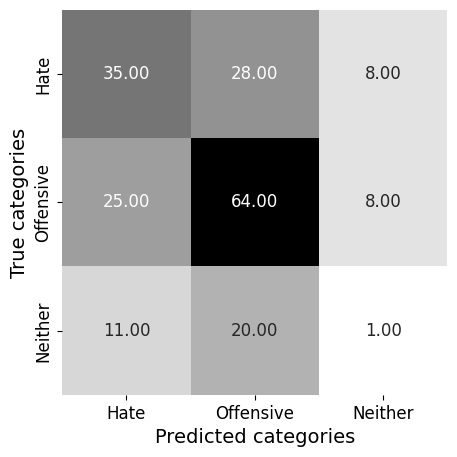


MultinomialNB with Feature Selection and Min-Max Scaling Normalized Confusion Matrix:


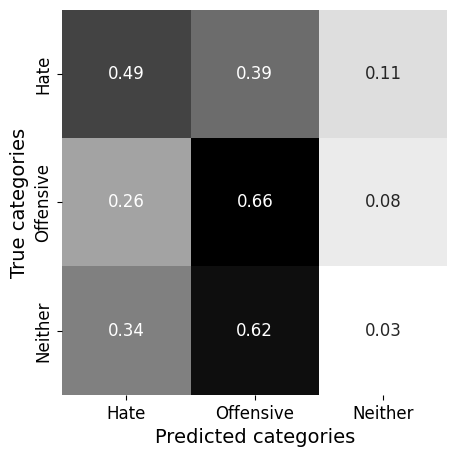

In [26]:
multinomial_nb(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
LinearSVC Classification Report:
              precision    recall  f1-score   support

        hate       0.44      0.48      0.46        71
     neither       0.56      0.57      0.56        97
   offensive       0.16      0.12      0.14        32

    accuracy                           0.47       200
   macro avg       0.39      0.39      0.39       200
weighted avg       0.45      0.47      0.46       200


LinearSVC Confusion Matrix (Counts):


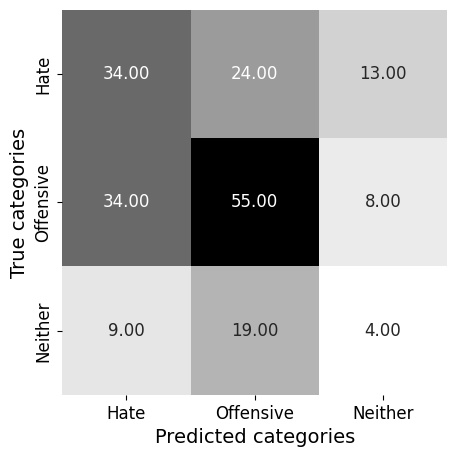


LinearSVC Normalized Confusion Matrix:


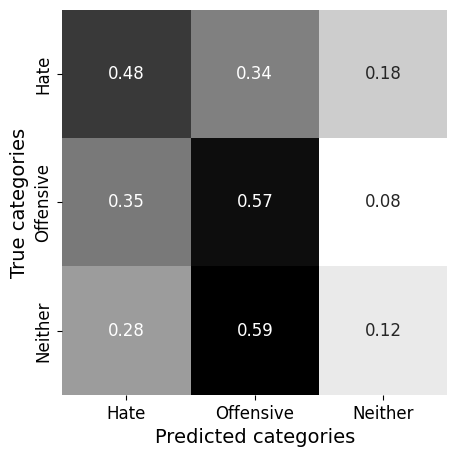

In [27]:
linear_svc(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
RandomForest Classification Report:
              precision    recall  f1-score   support

        hate       0.49      0.37      0.42        71
     neither       0.55      0.82      0.66        97
   offensive       0.00      0.00      0.00        32

    accuracy                           0.53       200
   macro avg       0.35      0.40      0.36       200
weighted avg       0.44      0.53      0.47       200


RandomForest Confusion Matrix (Counts):


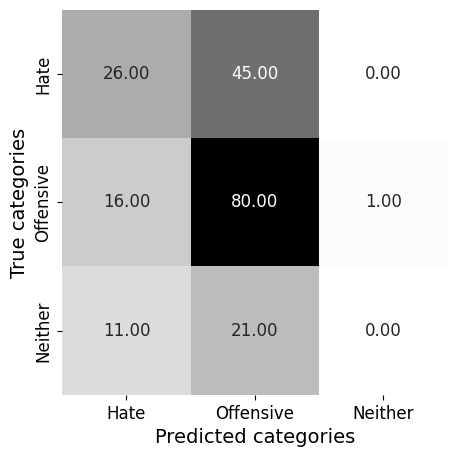


RandomForest Normalized Confusion Matrix:


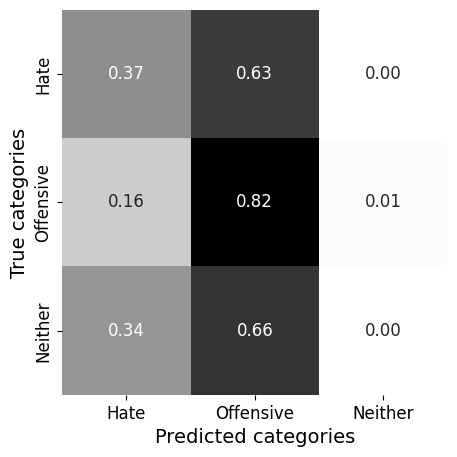

In [28]:
random_forest(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............model__C=0.001, select__threshold=mean; total time=   1.9s
[CV] END .............model__C=0.001, select__threshold=mean; total time=   2.0s
[CV] END .............model__C=0.001, select__threshold=mean; total time=   1.9s
[CV] END .............model__C=0.001, select__threshold=mean; total time=   1.9s
[CV] END .............model__C=0.001, select__threshold=mean; total time=   1.9s
[CV] END ...........model__C=0.001, select__threshold=median; total time=   1.8s
[CV] END ...........model__C=0.001, select__threshold=median; total time=   1.8s
[CV] END ...........model__C=0.001, select__threshold=median; total time=   1.9s
[CV] END ...........model__C=0.001, select__threshold=median; total time=   2.0s
[CV] END ...........model__C=0.001, select__threshold=median; total time=   2.0s
[CV] END ..............model__C=0.01, select__threshold=mean; total time=   1.9s
[CV] END ..............model__C=0.01, select__thr

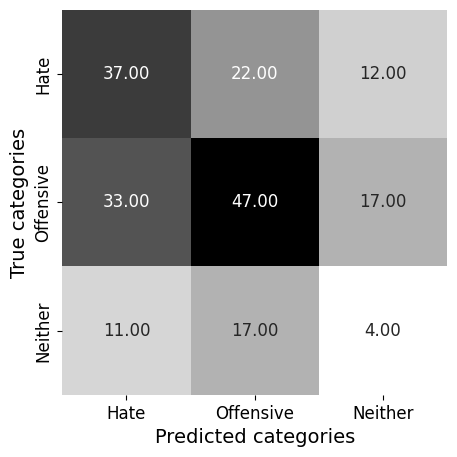


Logistic Regression with Feature Selection Normalized Confusion Matrix:


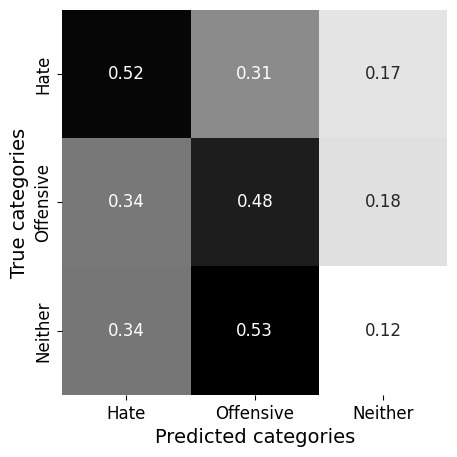

In [29]:
logistic_regression(X_train, y_train, X_test, y_test)

# Conclusion and Future Direction


From the paper and associated literature review, there is a strong conclusion that the datasets being used at the time of the paper were very different in their labeling process.  This will hugely impact any machine learning classification done from that point on.  Further work on this field should be focused on creating a standard for the labeling process with the optimization of the machine learning coming second.  Public hate speech data sets that are currently available are not standardized leading to stagnation in the research.  Private company work inside the social network platforms is likely far ahead of what is publically available.

The second learning is that without a well laid out code repository, it is extremely difficult to duplicate the results.  This paper, though being published in a technical journal, was definitely more focused on the social science side of the project than on the AI optimization.  A well laid out repository explaining all of the code would have made this project more useful and would have allowed us more time for advancing the classification.

To achieve the next tier of modeling accuracy, we would have to move to embeddings produced by large language models.  There is a group of papers from 2020 and 2021 which have achieved good results on a variety of data sets that would be useful to build from.


# References:

[1]: Kwok, I., & Wang, Y. (2013). Locate the Hate: Detecting Tweets against Blacks. Proceedings of the AAAI Conference on Artificial Intelligence, 27(1), 1621-1622. https://doi.org/10.1609/aaai.v27i1.8539

[2]: Burnap, P., and Williams, M. L. 2015. Cyber hate speech on
twitter: An application of machine classification and statistical
modeling for policy and decision making. Policy & Internet
7(2):223–242.

[3]: Wang, W., Chen, L., Thirunarayan, K., & Sheth, A. P. (2014). Cursing in English on Twitter. Proceedings of the 17th ACM Conference on Computer Supported Cooperative Work & Social Computing, 415-424.
https://corescholar.libraries.wright.edu/knoesis/590

[4]: Gitari, N. D.; Zuping, Z.; Damien, H.; and Long, J. 2015. A
lexicon-based approach for hate speech detection. International
Journal of Multimedia and Ubiquitous Engineering 10:215–
230.

[5]: Silva, L. A.; Mondal, M.; Correa, D.; Benevenuto, F.; and Weber,
I. 2016. Analyzing the targets of hate in online social media.
In ICWSM, 687–690.

[6]: Zeerak Waseem and Dirk Hovy. 2016. Hateful Symbols or Hateful People? Predictive Features for Hate Speech Detection on Twitter. In Proceedings of the NAACL Student Research Workshop, pages 88–93, San Diego, California. Association for Computational Linguistics.

[7]: Nemanja Djuric, Jing Zhou, Robin Morris, Mihajlo Grbovic, Vladan Radosavljevic, and Narayan Bhamidipati. 2015. Hate Speech Detection with Comment Embeddings. In Proceedings of the 24th International Conference on World Wide Web (WWW '15 Companion). Association for Computing Machinery, New York, NY, USA, 29–30. https://doi.org/10.1145/2740908.2742760

[8]: Mollas, I., Chrysopoulou, Z., Karlos, S. et al. ETHOS: a multi-label hate speech detection dataset. Complex Intell. Syst. 8, 4663–4678 (2022). https://doi.org/10.1007/s40747-021-00608-2

[9]: Davidson, Thomas & Warmsley, Dana & Macy, Michael & Weber, Ingmar. (2017). Automated Hate Speech Detection and the Problem of Offensive Language. Proceedings of the International AAAI Conference on Web and Social Media. 11. 10.1609/icwsm.v11i1.14955.
